In [33]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import nltk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [34]:
df = pd.read_excel('test2.xlsx')
df.head(3)

articles = df['Comments'].tolist()
print(len(articles))  # 30

articles = ' '.join(articles)
articles = articles[:10000]
print(articles)

80
저희 어머니가 특수학교 교사로 30년 넘게 근무하시다 퇴직하셨습니다.
학생들한테 머리카락 움켜잡히기도 하시고, 맞으신 적도 있으시지만 항상 보람 느끼시면서 사랑으로 학생들 대하시는 걸 보면서 특수학교 선생님은 정말 봉사하는 자리라고 느꼈었거든요.. 진심으로 아이들을 위하지 않으면 오래 일하기 힘든 자리인데 이번에 직위해제 된 교사분이 20년 경력이라는 이야기 듣고 남 얘기 같지가 않아서 마음이 너무 아프네요. 유명작가가 뭐라고 국민의 학습권에 지장을 주고 교사를 직위해제하고 갑질을 합니까 국민의 권리를 지키고 교사의 권위를 회복시켜주세요 본인 아들이 친구를 때리고 성기를 노출하는 지속적인 행동들은 모두가 이해해줘야 하는 돌발행동이고, 교사의 말 몇 마디와 한숨은 아동학대로 고소할 일인가봐요. 진짜 역겹기 짝이없네, 피해여학생 부모가 왜 선생님은 가해자편만 드냐고까지 했다는데, 그렇게 애쓴 쌤을 고소하고 직위해제로 보답하네, 인간이냐, 
그 귀한 아들 집에서 니들이 끼고 뭔짓해도 한숨쉬지 말고 예쁜말로만 가르치세요, 더큰 피해입히지 않도록 성교육 꼭 잘하시고. 솔직히 특수교사 편에 서는 거 쉽지 않다. 댓글 쓰는것도 명예훼손 및 법적 조치 운운하는데 인터뷰해주신 동료쌤들, 학부모들 이 모든걸 감수하고서라도 나서주는 것이다. 이것만 봐도 선생님의 인품을 알수있다. 주작가가 피해아동 학부모에게 미안하다는  사과를 직접적으로 한적이 없다는-선생님이 읍소하면서 이끌어낸 합의-댓글이 있던데  이게 사실이면 정말 아니라는 생각이 든다. 5명의 변호사들을 찾아가서 자문을 구했음에도 국선변호사까지 선임하여 어떻게든 한 사람의 인생을 개박살내려했던게 진짜 악질이다 저렇게 오냐오냐 키우다 진짜 여성상대로 큰범죄 저지르면 어떡해요? 진심 비아냥이 아니라 미래의 딸들이 걱정되서그래요; 여자애 머리채잡고 뺨때렸다는데 이게 선처가 되요? 진짜 무슨생각으로 저렇게 당당하죠? 묻지마폭행 같은게 남일이 아니예요 똑바로 훈육시켜서 여자애한테 피해 입히지마세요 당신 아들만귀한거 아닙니다. 

In [35]:
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(articles, norm=True, stem=True) # POS Tagging
print(raw_pos_tagged)

[('저희', 'Noun'), ('어머니', 'Noun'), ('가', 'Josa'), ('특수', 'Noun'), ('학교', 'Noun'), ('교사', 'Noun'), ('로', 'Josa'), ('30년', 'Number'), ('넘다', 'Verb'), ('근무', 'Noun'), ('하다', 'Verb'), ('퇴직', 'Noun'), ('하다', 'Verb'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('학생', 'Noun'), ('들', 'Suffix'), ('한테', 'Josa'), ('머리카락', 'Noun'), ('움켜잡히다', 'Verb'), ('기도', 'Noun'), ('하다', 'Verb'), (',', 'Punctuation'), ('맞다', 'Verb'), ('적도', 'Noun'), ('있다', 'Adjective'), ('항상', 'Noun'), ('보람', 'Noun'), ('느끼다', 'Verb'), ('사랑', 'Noun'), ('으로', 'Josa'), ('학생', 'Noun'), ('들', 'Suffix'), ('대다', 'Verb'), ('걸', 'Noun'), ('보다', 'Verb'), ('특수', 'Noun'), ('학교', 'Noun'), ('선생님', 'Noun'), ('은', 'Josa'), ('정말', 'Noun'), ('봉사', 'Noun'), ('하다', 'Verb'), ('자리', 'Noun'), ('라고', 'Josa'), ('느끼다', 'Verb'), ('..', 'Punctuation'), ('진심', 'Noun'), ('으로', 'Josa'), ('아이', 'Noun'), ('들', 'Suffix'), ('을', 'Josa'), ('위', 'Noun'), ('하다', 'Verb'), ('않다', 'Verb'), ('오래', 'Adverb'), ('일', 'Noun'), ('하다', 'Verb'), ('힘드다', 'Adjective'), ('자리', 'Noun

<!-- 품사 처리 -->

In [36]:
del_list = ['주호민','하다', '와', '과', '으로', '로', '에서', '에게', '로부터', '까지', '이다', '와서', '든지', '마다', '이나', '아', 
            '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', 
            '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', 
            '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', 
            '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', 
            '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서',
            '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', 
            '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', 
            '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다',
            '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', 
            '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', 
            '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', 
            '반대로 말하자면', '이와 반대로', '바꾸어서 말하면', '바꾸어서 한다면', '만약', '그렇지않으면', '까악', '툭', '딱', '삐걱거리다',
            '보드득', '비걱거리다', '꽈당', '응당', '해야한다', '에 가서', '각', '각각', '여러분', '각종', '각자', '제각기', '하도록하다', 
            '와', '과', '그러므로', '그래서', '고로', '한 까닭에', '하기 때문에', '거니와', '이지만', '대하여', '관하여', '관한', '과연',
            '실로', '아니나다를가', '생각한대로', '진짜로', '한적이있다', '하곤하였다', '하', '하하', '허허', '아하', '거바', '와', '오', 
            '왜', '어째서', '무엇때문에', '어찌', '하겠는가', '무슨', '어디', '어느곳', '더군다나', '하물며', '더욱이는', '어느때', '언제', 
            '야', '이봐', '어이', '여보시오', '흐흐', '흥', '휴', '헉헉', '헐떡헐떡', '영차', '여차', '어기여차', '끙끙', '아야', '앗', '아야',
            '콸콸', '졸졸', '좍좍', '뚝뚝', '주룩주룩', '솨', '우르르', '그래도', '또', '그리고', '바꾸어말하면', '바꾸어말하자면', '혹은', '혹시',
            '답다', '및', '그에 따르는', '때가 되어', '즉', '지든지', '설령', '가령', '하더라도', '할지라도', '일지라도', '지든지', '몇', '거의', 
            '하마터면', '인젠', '이젠', '된바에야', '된이상', '만큼','어찌됏든', '그위에', '게다가', '점에서 보아', '비추어 보아', '고려하면', '하게될것이다',
            '일것이다', '비교적', '좀', '보다더', '비하면', '시키다', '하게하다', '할만하다', '의해서', '연이서', '이어서', '잇따라', '뒤따라', '뒤이어',
            '결국', '의지하여', '기대여', '통하여', '자마자', '더욱더', '불구하고', '얼마든지', '마음대로', '주저하지 않고', '곧', '즉시', '바로', 
            '당장', '하자마자', '밖에 안된다', '하면된다', '그래', '그렇지', '요컨대', '다시 말하자면', '바꿔 말하면', '즉', '구체적으로', '말하자면',
            '시작하여', '시초에', '이상', '허', '헉', '허걱', '바와같이', '해도좋다', '해도된다', '게다가', '더구나', '하물며', '와르르', '팍', '퍽',
            '펄렁', '동안', '이래', '하고있었다', '이었다', '에서', '로부터', '까지', '예하면', '했어요', '해요', '함께', '같이', '더불어', '마저', '마저도',
            '양자', '모두', '습니다', '가까스로', '하려고하다', '즈음하여', '다른', '다른 방면으로', '해봐요', '습니까', '했어요', '말할것도 없고', '무릎쓰고', 
            '개의치않고', '하는것만 못하다', '하는것이 낫다', '매', '매번', '들', '모', '어느것', '어느', '로써', '갖고말하자면', '어디', '어느쪽', '어느것',
            '어느해', '어느 년도', '라 해도', '언젠가', '어떤것', '어느것', '저기', '저쪽', '저것', '그때', '그럼', '그러면', '요만한걸', '그래', '그때',
            '저것만큼', '그저', '이르기까지', '할 줄 안다', '할 힘이 있다', '너', '너희', '당신', '어찌', '설마', '차라리', '할지언정', '할지라도', '할망정',
            '할지언정', '구토하다', '게우다', '토하다', '메쓰겁다', '옆사람', '쳇', '의거하여', '근거하여', '의해', '따라', '힘입어', '그', '다음', '버금',
            '두번째로', '기타', '첫번째로', '나머지는', '그중에서', '견지에서', '형식으로 쓰여', '입장에서', '위해서', '단지', '의해되다', '하도록시키다',
            '뿐만아니라', '반대로', '전후', '전자', '앞의것', '잠시', '잠깐', '하면서', '그렇지만', '다음에', '그러한즉', '그런즉', '남들', '아무거나',
            '어찌하든지', '같다', '비슷하다', '예컨대', '이럴정도로', '어떻게', '만약', '만일', '위에서 서술한바와같이', '인 듯하다', '하지 않는다면', 
            '만약에', '무엇', '무슨', '어느', '어떤', '아래윗', '조차', '한데', '그럼에도 불구하고', '여전히', '심지어', '까지도', '조차도', '하지 않도록', 
            '않기 위하여', '때', '시각', '무렵', '시간', '동안', '어때', '어떠한', '하여금', '네', '예', '우선', '누구', '누가 알겠는가', '아무도', '줄은모른다', 
            '줄은 몰랏다', '하는 김에', '겸사겸사', '하는바', '그런 까닭에', '한 이유는', '그러니', '그러니까', '때문에', '그', '너희', '그들', '너희들', '타인',
            '것', '것들', '너', '위하여', '공동으로', '동시에', '하기 위하여', '어찌하여', '무엇때문에', '붕붕', '윙윙', '나', '우리']

# 불용어 제거
word_cleaned = []
for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외, 대신 "안, 못"같은 것까지 같이 지워져서 긍정,부정을 파악해야 되는경우는 제외하지 않는다.
            word_cleaned.append(word[0])
        
print(word_cleaned)

['어머니', '특수', '학교', '교사', '30년', '넘다', '근무', '퇴직', '학생', '머리카락', '움켜잡히다', '기도', '맞다', '적도', '있다', '항상', '보람', '느끼다', '사랑', '학생', '대다', '보다', '특수', '학교', '선생님', '정말', '봉사', '자리', '느끼다', '진심', '아이', '않다', '오래', '힘드다', '자리', '이번', '직위해제', '되다', '교사', '20년', '경력', '이야기', '듣다', '얘기', '않다', '마음', '너무', '아프다', '유명', '작가', '뭐라다', '국민', '학습', '지장', '주다', '교사', '직위해제', '갑질', '국민', '권리', '지키다', '교사', '권위', '회복', '본인', '아들', '친구', '때리다', '성기', '노출하다', '지속', '행동', '이해', '해주다', '돌발행동', '교사', '마디', '한숨', '아동학대', '고소하다', '일인', '가보다', '진짜', '역겹다', '없다', '피해', '여학생', '부모', '선생님', '가해자', '들다', '그렇게', '애쓰다', '고소하다', '직위해제', '보답', '인간', '귀하다', '아들', '해도', '한숨', '예쁘다', '말로', '가르치다', '크다', '피해', '입히다', '않다', '성교육', '솔직하다', '특수', '교사', '서다', '쉬다', '않다', '댓글', '쓰다', '명예훼손', '법적', '조치', '울다', '인터뷰', '해주다', '동료', '학부모', '모든', '감수', '고서', '나서다', '보다', '선생님', '인품', '알다', '주작', '가가', '피해', '아동', '학부모', '미안하다', '사과', '직접', '한적', '없다', '선생님', '소하', '면서', '이끌다', '내다', '합의', '댓글', '있다', '사실', '이면', '정말', '아니다', '생각', '

일반적으로 사용되는 한국어 불용어 리스트를 만들어 제거해주었다.

In [37]:
result = Counter(word_cleaned)
word_dic = dict(result)
print(word_dic)

{'어머니': 2, '특수': 9, '학교': 22, '교사': 39, '30년': 1, '넘다': 3, '근무': 2, '퇴직': 1, '학생': 16, '머리카락': 1, '움켜잡히다': 1, '기도': 1, '맞다': 6, '적도': 1, '있다': 32, '항상': 2, '보람': 1, '느끼다': 3, '사랑': 1, '대다': 3, '보다': 13, '선생님': 39, '정말': 11, '봉사': 1, '자리': 2, '진심': 2, '아이': 30, '않다': 16, '오래': 2, '힘드다': 3, '이번': 2, '직위해제': 11, '되다': 37, '20년': 2, '경력': 1, '이야기': 1, '듣다': 1, '얘기': 1, '마음': 2, '너무': 6, '아프다': 2, '유명': 1, '작가': 4, '뭐라다': 1, '국민': 4, '학습': 3, '지장': 1, '주다': 4, '갑질': 2, '권리': 3, '지키다': 4, '권위': 1, '회복': 2, '본인': 9, '아들': 23, '친구': 8, '때리다': 11, '성기': 6, '노출하다': 4, '지속': 2, '행동': 10, '이해': 7, '해주다': 15, '돌발행동': 1, '마디': 3, '한숨': 2, '아동학대': 7, '고소하다': 9, '일인': 1, '가보다': 2, '진짜': 14, '역겹다': 3, '없다': 20, '피해': 17, '여학생': 6, '부모': 21, '가해자': 2, '들다': 4, '그렇게': 2, '애쓰다': 1, '보답': 2, '인간': 3, '귀하다': 4, '해도': 4, '예쁘다': 1, '말로': 1, '가르치다': 4, '크다': 7, '입히다': 2, '성교육': 1, '솔직하다': 2, '서다': 2, '쉬다': 2, '댓글': 2, '쓰다': 1, '명예훼손': 1, '법적': 1, '조치': 1, '울다': 1, '인터뷰': 1, '동료': 1, '학부모': 19, '모든': 4, '감수': 1

Counter메소드를 통해 각 단어가 나온 횟수를 세주고, dict를 통해 캐스팅 하였다.

In [38]:
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
print(sorted_word_dic)

[('교사', 39), ('선생님', 39), ('되다', 37), ('있다', 32), ('아이', 30), ('아들', 23), ('학교', 22), ('부모', 21), ('없다', 20), ('학부모', 19), ('자기', 19), ('피해', 17), ('아니다', 17), ('사람', 17), ('학생', 16), ('않다', 16), ('해주다', 15), ('진짜', 14), ('그렇다', 14), ('보다', 13), ('장애', 12), ('정말', 11), ('직위해제', 11), ('때리다', 11), ('어떻다', 11), ('자식', 11), ('자폐', 11), ('받다', 11), ('바라다', 11), ('행동', 10), ('내다', 10), ('훈육', 10), ('특수', 9), ('본인', 9), ('고소하다', 9), ('녹음기', 9), ('친구', 8), ('부부', 8), ('이해', 7), ('아동학대', 7), ('크다', 7), ('아동', 7), ('사과', 7), ('생각', 7), ('여자애', 7), ('정도', 7), ('힘들다', 7), ('잘못', 7), ('맞다', 6), ('너무', 6), ('성기', 6), ('여학생', 6), ('오다', 6), ('키우다', 6), ('말다', 6), ('고소', 6), ('때문', 6), ('선생', 6), ('보내다', 6), ('배려', 6), ('넣다', 6), ('그냥', 6), ('이렇다', 6), ('안되다', 6), ('알다', 5), ('되어다', 5), ('지다', 5), ('폭력', 5), ('상황', 5), ('싶다', 5), ('판결', 5), ('나다', 5), ('나오다', 5), ('학급', 5), ('그걸', 5), ('피해자', 5), ('교육', 5), ('필요하다', 5), ('애가', 5), ('인정', 5), ('대단하다', 5), ('엄마', 5), ('작가', 4), ('국민', 4), ('주다', 4), ('지

단어의 중복 횟수를 토대로 정렬해주었다.

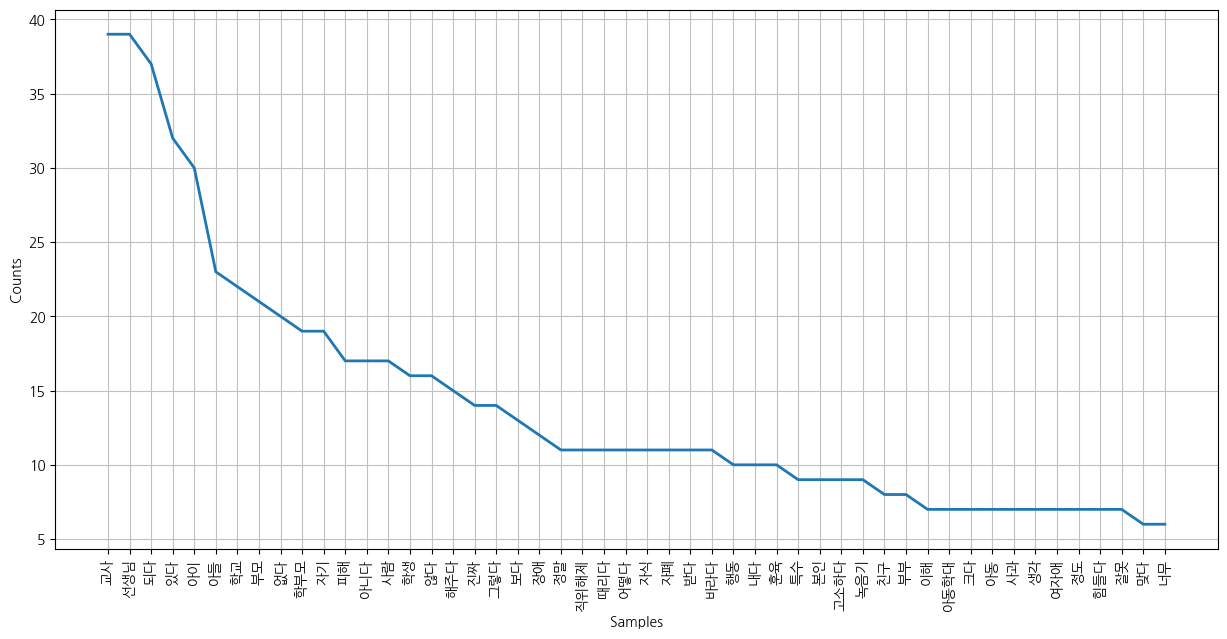

<Axes: xlabel='Samples', ylabel='Counts'>

In [39]:
font_name = matplotlib.font_manager.FontProperties(fname="NanumGothicBold.ttf").get_name() 
matplotlib.rc('font', family=font_name)

word_counted = nltk.Text(word_cleaned)
plt.figure(figsize=(15,7))
word_counted.plot(50)

위의 단어들을 토대로 matplotlib을 이용해 그래프를 그려주었다.

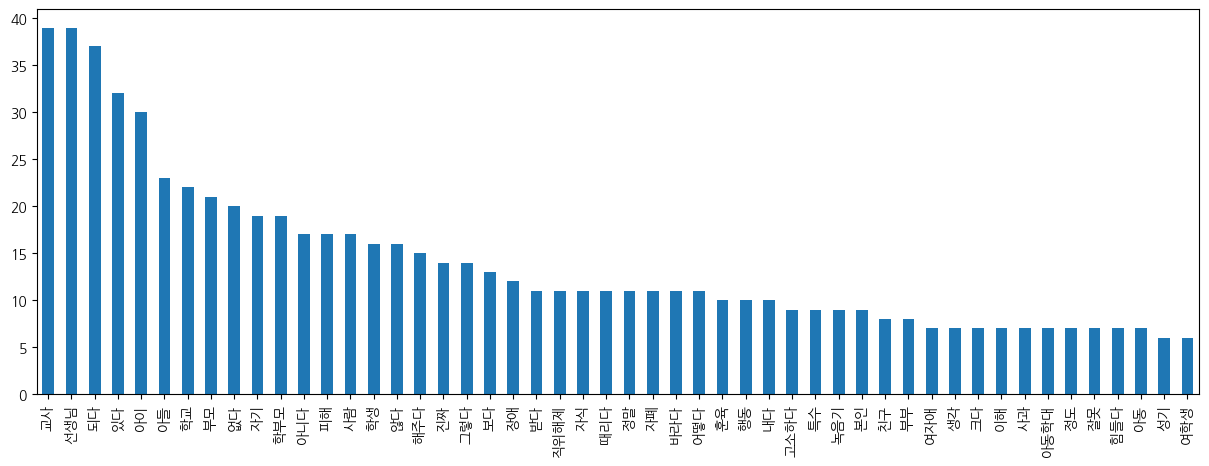

In [40]:
word_frequency = nltk.FreqDist(word_cleaned)
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys())

result = df.sort_values([0], ascending = False)
result = result[:50]
result.plot(kind='bar', legend=False, figsize=(15,5))
plt.show()